## Preprocessing

In [27]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline


In [28]:
#this section splits the unit from the amount into seperate columns for our adjuncts
#it then converts them to real numbers instead of strings for conversion
pd.set_option('display.max_columns', 500)
beer_df= pd.read_csv('beer_data_cleaned8-23_with_nums.csv')
beer_df['Adjunct1Num'],beer_df['Adjunct1Unit'] = beer_df['Adjunct1Amount'].str.split().str
beer_df['Adjunct2Num'],beer_df['Adjunct2Unit'] = beer_df['Adjunct2Amount'].str.split().str
beer_df['Adjunct3Num'],beer_df['Adjunct3Unit'] = beer_df['Adjunct3Amount'].str.split().str
beer_df['Adjunct4Num'],beer_df['Adjunct4Unit'] = beer_df['Adjunct4Amount'].str.split().str
beer_df['Adjunct5Num'],beer_df['Adjunct5Unit'] = beer_df['Adjunct5Amount'].str.split().str
beer_df.head(40)


,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,color_levibonds,mashph,Base Malt Amount,Base Malt,BasePPG,BaseColor,BasePercentage,SpecialtyMalt1Amount,SpecialtyMalt1Name,SpecialtyMalt1PPG,SpecialtyMalt1Color,SpecialtyMalt1Percentage,SpecialtyMalt2Amount,SpecialtyMalt2Name,SpecialtyMalt2PPG,SpecialtyMalt2Color,SpecialtyMalt2Percentage,SpecialtyMalt3Amount,SpecialtyMalt3Name,SpecialtyMalt3PPG,SpecialtyMalt3Color,SpecialtyMalt3Percentage,hop1amount,hop1name,hop1type,hop1alpha,hop1timing,hop1time,hop1ibu,hop1percent,hop2amount,hop2name,hop2type,hop2alpha,hop2timing,hop2time,hop2ibu,hop2percent,hop3amount,hop3name,hop3type,hop3alpha,hop3timing,hop3time,hop3ibu,hop3percent,hop4amount,hop4name,hop4type,hop4alpha,hop4timing,hop4time,hop4ibu,hop4percent,hop5amount,hop5name,hop5type,hop5alpha,hop5timing,hop5time,hop5ibu,hop5percent,YeastStrain,Attenuation,Flocculation,LowTemp,HighTemp,Starter?,Adjunct1Amount,Adjunct1Name,Adjunct1Type,Adjunct1Timing,Adjunct2Amount,Adjunct2Name,Adjunct2Type,Adjunct2Timing,Adjunct3Amount,Adjunct3Name,Adjunct3Type,Adjunct3Timing,Adjunct4Amount,Adjunct4Name,Adjunct4Type,Adjunct4Timing,Adjunct5Amount,Adjunct5Name,Adjunct5Type,Adjunct5Timing,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit
0,All Grain,Standard/Ordinary Bitter,480.0,1.041,1.008,4.31,25.98,3.00,NaN,75.000,Simpsons - Low Colour Maris Otter,37.0,1.72,97.4,2.000,Crisp Malting - Caramalt,34.0,15.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Tettnanger,Leaf/Whole,4.50,Boil,1.333333,6.93,14.3,250.0,Tettnanger,Leaf/Whole,4.50,Boil,0.333333,3.31,11.9,1000.0,Tettnanger,Leaf/Whole,4.50,Aroma,0.083333,4.36,47.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Grain,Belgian Dubbel,1800.0,1.117,1.027,11.83,13.47,9.20,5.35,300.000,United Kingdom - Maris Otter Pale,38.0,3.75,40.0,25.000,United Kingdom - Dextrine Malt,33.0,1.8,3.3,50.000,United Kingdom - Munich,37.0,6.0,6.7,25.000,Crisp Malting - Caramalt 15L,32.7,17.5,3.3,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.333333,1.76,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyeast - Belgian Ardennes 3522,0.74,High,18.0,29,No,250 g,Gypsum,Water Agent,Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Partial Mash,Robust Porter,20.8,1.077,1.015,8.11,14.06,25.81,NaN,0.454,Briess - Pale Ale Malt 2-Row,36.8,3.50,8.5,0.454,Briess - Rye Raw,35.3,3.0,8.5,0.113,Crisp Malting - Pale Chocolate,32.7,220.0,2.1,0.113,Briess - Black Barley,25.0,500.0,2.1,28.0,Cascade,Pellet,6.30,Boil,1.000000,4.12,3.7,336.0,Mount Hood,Leaf/Whole,4.80,Boil,0.500000,1.32,44.4,336.0,Mount Hood,Leaf/Whole,4.80,Aroma,0.000000,0.00,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mangrove Jack - British Ale Yeast M07,0.78,High,57.0,72,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All Grain,American IPA,200.0,1.064,1.012,6.76,33.79,13.53,NaN,43.000,United Kingdom - Maris Otter Pale,38.0,3.75,79.2,6.800,American - Caramel / Crystal 60L,34.0,60.0,12.5,4.500,German - Munich Light,37.0,6.0,8.3,NaN,NaN,NaN,NaN,NaN,210.0,Centennial,Pellet,10.00,Boil,0.500000,18.43,19.3,300.0,Centennial,Pellet,10.00,Aroma,0.000000,0.00,27.5,300.0,Cascade,Pellet,4.00,Aroma,0.000000,0.00,27.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All Grain,Blonde Ale,1589.9,1.0

In [29]:
beer_df.dtypes #check dytpes to be sure they will work for clustering

Batch_Style                  object
Category                     object
Batch_size_liters           float64
og                          float64
fg                          float64
abv                         float64
ibu                         float64
color_levibonds             float64
mashph                      float64
Base Malt Amount            float64
Base Malt                    object
BasePPG                     float64
BaseColor                   float64
BasePercentage              float64
SpecialtyMalt1Amount        float64
SpecialtyMalt1Name           object
SpecialtyMalt1PPG           float64
SpecialtyMalt1Color         float64
SpecialtyMalt1Percentage    float64
SpecialtyMalt2Amount        float64
SpecialtyMalt2Name           object
SpecialtyMalt2PPG           float64
SpecialtyMalt2Color         float64
SpecialtyMalt2Percentage    float64
SpecialtyMalt3Amount        float64
SpecialtyMalt3Name           object
SpecialtyMalt3PPG           float64
SpecialtyMalt3Color         

In [30]:
pd.set_option('display.max_rows', 500)
objects = ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num'] #need to convert to numeric here
def nums():
    for i in objects:
        beer_df[i] = beer_df[i].astype(float).round(2)
    return beer_df
nums()


,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,color_levibonds,mashph,Base Malt Amount,Base Malt,BasePPG,BaseColor,BasePercentage,SpecialtyMalt1Amount,SpecialtyMalt1Name,SpecialtyMalt1PPG,SpecialtyMalt1Color,SpecialtyMalt1Percentage,SpecialtyMalt2Amount,SpecialtyMalt2Name,SpecialtyMalt2PPG,SpecialtyMalt2Color,SpecialtyMalt2Percentage,SpecialtyMalt3Amount,SpecialtyMalt3Name,SpecialtyMalt3PPG,SpecialtyMalt3Color,SpecialtyMalt3Percentage,hop1amount,hop1name,hop1type,hop1alpha,hop1timing,hop1time,hop1ibu,hop1percent,hop2amount,hop2name,hop2type,hop2alpha,hop2timing,hop2time,hop2ibu,hop2percent,hop3amount,hop3name,hop3type,hop3alpha,hop3timing,hop3time,hop3ibu,hop3percent,hop4amount,hop4name,hop4type,hop4alpha,hop4timing,hop4time,hop4ibu,hop4percent,hop5amount,hop5name,hop5type,hop5alpha,hop5timing,hop5time,hop5ibu,hop5percent,YeastStrain,Attenuation,Flocculation,LowTemp,HighTemp,Starter?,Adjunct1Amount,Adjunct1Name,Adjunct1Type,Adjunct1Timing,Adjunct2Amount,Adjunct2Name,Adjunct2Type,Adjunct2Timing,Adjunct3Amount,Adjunct3Name,Adjunct3Type,Adjunct3Timing,Adjunct4Amount,Adjunct4Name,Adjunct4Type,Adjunct4Timing,Adjunct5Amount,Adjunct5Name,Adjunct5Type,Adjunct5Timing,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit
0,All Grain,Standard/Ordinary Bitter,480.0,1.041,1.008,4.31,25.98,3.00,NaN,75.000,Simpsons - Low Colour Maris Otter,37.0,1.72,97.4,2.000,Crisp Malting - Caramalt,34.0,15.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Tettnanger,Leaf/Whole,4.50,Boil,1.333333,6.93,14.3,250.0,Tettnanger,Leaf/Whole,4.50,Boil,0.333333,3.31,11.9,1000.0,Tettnanger,Leaf/Whole,4.50,Aroma,0.083333,4.36,47.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Grain,Belgian Dubbel,1800.0,1.117,1.027,11.83,13.47,9.20,5.35,300.000,United Kingdom - Maris Otter Pale,38.0,3.75,40.0,25.000,United Kingdom - Dextrine Malt,33.0,1.8,3.3,50.000,United Kingdom - Munich,37.0,6.0,6.7,25.000,Crisp Malting - Caramalt 15L,32.7,17.5,3.3,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.333333,1.76,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,1000.0,Hallertau Mittelfruh,Pellet,3.75,Aroma,0.000000,0.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyeast - Belgian Ardennes 3522,0.74,High,18.0,29,No,250 g,Gypsum,Water Agent,Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Partial Mash,Robust Porter,20.8,1.077,1.015,8.11,14.06,25.81,NaN,0.454,Briess - Pale Ale Malt 2-Row,36.8,3.50,8.5,0.454,Briess - Rye Raw,35.3,3.0,8.5,0.113,Crisp Malting - Pale Chocolate,32.7,220.0,2.1,0.113,Briess - Black Barley,25.0,500.0,2.1,28.0,Cascade,Pellet,6.30,Boil,1.000000,4.12,3.7,336.0,Mount Hood,Leaf/Whole,4.80,Boil,0.500000,1.32,44.4,336.0,Mount Hood,Leaf/Whole,4.80,Aroma,0.000000,0.00,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mangrove Jack - British Ale Yeast M07,0.78,High,57.0,72,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All Grain,American IPA,200.0,1.064,1.012,6.76,33.79,13.53,NaN,43.000,United Kingdom - Maris Otter Pale,38.0,3.75,79.2,6.800,American - Caramel / Crystal 60L,34.0,60.0,12.5,4.500,German - Munich Light,37.0,6.0,8.3,NaN,NaN,NaN,NaN,NaN,210.0,Centennial,Pellet,10.00,Boil,0.500000,18.43,19.3,300.0,Centennial,Pellet,10.00,Aroma,0.000000,0.00,27.5,300.0,Cascade,Pellet,4.00,Aroma,0.000000,0.00,27.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermentis - Safale - American Ale Yeast US-05,0.81,Medium,12.0,25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All Grain,Blonde Ale,1589.9,1

Imperial    58975
Metric      37565
Name: Flag, dtype: int64

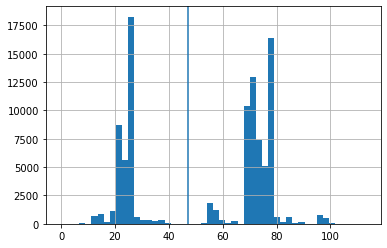

In [31]:
#this section finds a line to divide the dataset into imperial vs metric
beer_df['HighTemp'].hist(bins=50)
plt.axvline(47) #assign cutoff and create new variable to distinguish
beer_df.loc[beer_df['HighTemp'] <=47, 'Flag'] = 'Metric'
beer_df.loc[beer_df['HighTemp'] >47, 'Flag'] = 'Imperial'
beer_df['Flag'].value_counts()

In [32]:
#this section creates a dictionary of the unique values in the 5 adjunct unit columns to be used for a lookup later
adj_cols = ['Adjunct1Unit','Adjunct2Unit','Adjunct3Unit','Adjunct4Unit','Adjunct5Unit']
column_values = beer_df[adj_cols].values.ravel()
unique_values = pd.unique(column_values)
unique_values
convert_keys = [0,.035724, .033814, 0.00,0.00,0.00,0.00,0.00,0.00,.033814,0.00,2.2,0.00,.219969,0.00,.033814,0.00,.033814,0.00,0.00]

adjdict = dict(zip(unique_values, convert_keys))
adjdict

{nan: 0,
 &#39;g&#39;: 0.035724,
 &#39;each&#39;: 0.033814,
 &#39;tsp&#39;: 0.0,
 &#39;ml&#39;: 0.0,
 &#39;tbsp&#39;: 0.0,
 &#39;oz&#39;: 0.0,
 &#39;lb&#39;: 0.0,
 &#39;L&#39;: 0.0,
 &#39;g/gal&#39;: 0.033814,
 &#39;qt&#39;: 0.0,
 &#39;g/l&#39;: 2.2,
 &#39;ml/gal&#39;: 0.0,
 &#39;days&#39;: 0.219969,
 &#39;hr.&#39;: 0.0,
 &#39;gal&#39;: 0.033814,
 &#39;kg&#39;: 0.0,
 &#39;ml/l&#39;: 0.033814,
 &#39;mg/l&#39;: 0.0,
 &#39;min.&#39;: 0.0}

In [70]:
kg_cols = ['Base Malt Amount','SpecialtyMalt1Amount','SpecialtyMalt2Amount','SpecialtyMalt1Amount']
gram_cols = ['hop1amount','hop2amount','hop3amount','hop4amount','hop5amount']
celcius_cols= ['LowTemp','HighTemp']
adj_cols = ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']
conversion_cols = kg_cols + gram_cols + celcius_cols + adj_cols

def convert(columns): 
        for column in columns:
            if column in adj_cols:
                number_column = beer_df[column]
                unit_column = column[:-3]+'{}'.format('Unit')
                for i in range(len(beer_df[number_column])):
                    print(beer_df[unit_column][i])
                    if beer_df[unit_column][i] in adjdict:
                        i = i * adjdict[i].value
                        return i 
                return beer_df[number_column].values


In [72]:
convert(conversion_cols)

KeyError: &quot;None of [Float64Index([  nan, 250.0,   nan,   nan,   nan,   nan,   nan,   nan,   nan,\n                nan,\n              ...\n                nan,   nan,   nan,   nan,   nan,   nan,   1.5,   nan,   nan,\n                nan],\n             dtype=&#39;float64&#39;, length=96540)] are in the [columns]&quot;

In [63]:
beer_df[conversion_cols]
#lookup_cols = beer_df.iloc[0:,-11:]
#print(lookup_cols[0:1])

,Base Malt Amount,SpecialtyMalt1Amount,SpecialtyMalt2Amount,SpecialtyMalt1Amount,hop1amount,hop2amount,hop3amount,hop4amount,hop5amount,LowTemp,HighTemp,Adjunct1Num,Adjunct2Num,Adjunct3Num,Adjunct4Num,Adjunct5Num
0,75.000,2.000,NaN,2.000,300.0,250.0,1000.0,NaN,NaN,12.0,25,NaN,NaN,NaN,NaN,NaN
1,300.000,25.000,50.000,25.000,1000.0,1000.0,1000.0,NaN,NaN,18.0,29,250.0,NaN,NaN,NaN,NaN
2,0.454,0.454,0.113,0.454,28.0,336.0,336.0,NaN,NaN,57.0,72,NaN,NaN,NaN,NaN,NaN
3,43.000,6.800,4.500,6.800,210.0,300.0,300.0,NaN,NaN,12.0,25,NaN,NaN,NaN,NaN,NaN
4,249.476,49.895,15.876,49.895,672.0,224.0,224.0,NaN,NaN,68.0,73,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96535,2.268,0.454,NaN,0.454,42.0,NaN,NaN,NaN,NaN,85.0,95,NaN,NaN,NaN,NaN,NaN
96536,2.268,2.268,NaN,2.268,28.0,NaN,NaN,NaN,NaN,90.0,108,1.5,NaN,NaN,NaN,NaN
96537,2.722,2.722,NaN,2.722,28.0,NaN,NaN,NaN,NaN,90.0,108,NaN,NaN,NaN,NaN,NaN
96538,4.000,7.000,NaN,7.000,30.0,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN


In [12]:
lookup_cols

,Adjunct1Num,Adjunct1Unit,Adjunct2Num,Adjunct2Unit,Adjunct3Num,Adjunct3Unit,Adjunct4Num,Adjunct4Unit,Adjunct5Num,Adjunct5Unit,Flag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metric
1,0.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metric
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imperial
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metric
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imperial
...,...,...,...,...,...,...,...,...,...,...,...
96535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imperial
96536,0.0,tsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imperial
96537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imperial
96538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metric


In [14]:
beer_df.to_csv('beer_df_for_classification.csv')

In [9]:
#a class that converts metric to imperial
class convert(object):
    """A class that converts rows in the dataframe from metric to imperial based on their unit labels"""
    def __init__(self,beer_df):
        self.beer_df = beer_df
    def kgtolb(self,row):
        for i in kg_cols:
           if (beer_df['Flag'].equals("Metric")):
               beer_df[i] = beer_df[i]*2.2
    def gram2oz(self,row):
        for i in gram_cols:
           if (beer_df['Flag'].equals("Metric")):
               beer_df[i] = beer_df[i]*.035274
    def celc2fah(self,row):
        for i in celcius_cols:
           if (beer_df['Flag'].equals("Metric")):
               beer_df[i] = (beer_df[i]*9/5)+32
    def met2imp(self,iterrow):
        for i in adj_cols:
            lookup(i)

In [10]:
#intended to call the class on the dataframe and apply the transformations
#def InitConv(row):
#   return convert(row)
#new_df = beer_df.apply(InitConv,axis=1)

In [32]:
#imports for the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,normalize, Normalizer,LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import MiniBatchKMeans

In [33]:
cat_attribs = beer_df.select_dtypes(include=['object']).columns
num_attribs = beer_df.select_dtypes(include=['int64','float64']).columns
num_attribs

Index(['Batch_size_liters', 'og', 'fg', 'abv', 'ibu', 'color_levibonds',
       'mashph', 'Base Malt Amount', 'BasePPG', 'BaseColor', 'BasePercentage',
       'SpecialtyMalt1Amount', 'SpecialtyMalt1PPG', 'SpecialtyMalt1Color',
       'SpecialtyMalt1Percentage', 'SpecialtyMalt2Amount', 'SpecialtyMalt2PPG',
       'SpecialtyMalt2Color', 'SpecialtyMalt2Percentage',
       'SpecialtyMalt3Amount', 'SpecialtyMalt3PPG', 'SpecialtyMalt3Color',
       'SpecialtyMalt3Percentage', 'hop1amount', 'hop1alpha', 'hop1time',
       'hop1ibu', 'hop1percent', 'hop2amount', 'hop2alpha', 'hop2time',
       'hop2ibu', 'hop2percent', 'hop3amount', 'hop3alpha', 'hop3time',
       'hop3ibu', 'hop3percent', 'hop4amount', 'hop4alpha', 'hop4time',
       'hop4ibu', 'hop4percent', 'hop5amount', 'hop5alpha', 'hop5time',
       'hop5ibu', 'hop5percent', 'Attenuation', 'LowTemp', 'HighTemp',
       'Adjunct1Num', 'Adjunct2Num', 'Adjunct3Num', 'Adjunct4Num',
       'Adjunct5Num'],
      dtype='object')

In [87]:
#handles numerical values, imputing the mean and scaling (standard instead of minmax since it handles outliers better)
num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('standardizer', StandardScaler())
    ])

#handles categorical values, imputing the most frequent and onehot encoding
cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('label_encode', OrdinalEncoder())
    ])
#pulls together two pipelines
pre_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [35]:
number_of_clusters = beer_df.Category.unique()
len(number_of_clusters)

167

In [36]:
cluster = Pipeline(
 [
     (
        "kmeans",
        MiniBatchKMeans(
            n_clusters=167,
            batch_size=1000,
            compute_labels=True,
            max_iter=100,
            random_state=33,
            max_no_improvement=50,
            reassignment_ratio=0.01,
            ),

      ),
 ]
)
full_pipeline = Pipeline(steps=
[
    ("preprocessor", pre_pipeline),
    ("clusterer",cluster)
    
])

In [37]:
#calling full pipeline on dataset
beer_prepared = pd.DataFrame(full_pipeline.fit_transform(beer_df))

In [88]:
#calling just pre-processing pipeline on dataset
beer_processed = pd.DataFrame(pre_pipeline.fit_transform(beer_df))

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

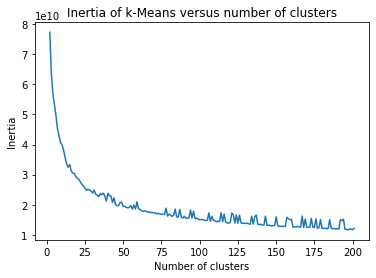

In [89]:
#import necessary packages and plot inertia of MiniBatchKMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
scores = [MiniBatchKMeans(n_clusters=i+2).fit(beer_processed).inertia_ 
          for i in range(200)]
sns.lineplot(np.arange(2, 202), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [90]:
#perform minibatch and normalize minibatch kmeans
kmeans = MiniBatchKMeans(n_clusters=167,batch_size=1000,compute_labels=True,max_iter=100,random_state=33,max_no_improvement=50,reassignment_ratio=0.01).fit(beer_processed)
normalized_vectors = preprocessing.normalize(beer_processed)
normalized_kmeans = MiniBatchKMeans(n_clusters=167,batch_size=1000,compute_labels=True,max_iter=100,random_state=33,max_no_improvement=50,reassignment_ratio=0.01).fit(normalized_vectors)

In [91]:
#print silhouette score for two kmeans algos
print('kmeans: {}'.format(silhouette_score(beer_prepared, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.19852415729248962
Cosine kmeans:0.32994342210690675


In [ ]:
#visualizing kmeans (not working at the moment)
#plt.scatter(beer_processed[:,0], beer_processed[:,1], c= kmeans.labels_.astype(float))

In [ ]:
#visualizing normalized kmeans (not working currently)
#plt.scatter(beer_processed[:,0], beer_processed[:,1], c= normalized_kmeans.labels_.astype(float))

In [93]:
#finding the right value for epsilon using distance measures from Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(beer_processed)
distances, indices = nbrs.kneighbors(beer_processed)

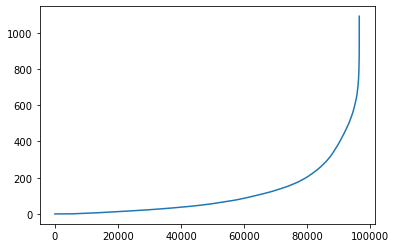

In [94]:
#plot the distances and look for an elbow for epsilon
#chose a minumum sample of around 2x the dimensionality of the dataset, a rule of thumb
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [95]:
dbscan = DBSCAN(eps=200, min_samples=100, algorithm="ball_tree").fit(beer_processed) #ball tree should help with speed
dblabels= dbscan.labels_
numclusters = len(set(dblabels))
numclusters
#way less clusters than our beer categories but still might be useful

47

In [96]:
#score of dbscan model (uses density vs distance)
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          dbscan.labels_,
                                          metric='cosine')))

Cosine kmeans:-0.3276686289658501


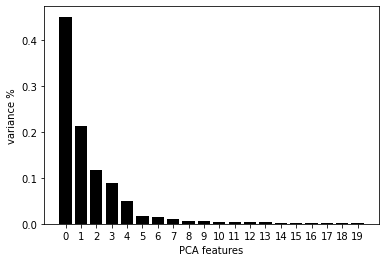

In [97]:
#pca and visaulization of clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(beer_processed)

#plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [ ]:
#tsne for visualization, need to debug
from sklearn.manifold import TSNE
tsne_3d_df = TSNE(n_compenents=3, beer_processed, kmeans.labels_)
tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_
tsne_3d_df['dbscan'] = dbscan.labels_

plot_animation(tsne_3d_df, 'kmeans', 'kmeans')
plot_animation(tsne_3d_df, 'normalized_kmeans', 'normalized_kmeans')
plot_animation(tsne_3d_df, 'dbscan', 'dbscan')

In [104]:
#feature importance exploration
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(beer_processed))
df_scaled['dbscan'] = dbscan.labels_
df_mean = (df_scaled.loc[df_scaled.dbscan!=-1, :]
                    .groupby('dbscan').mean())

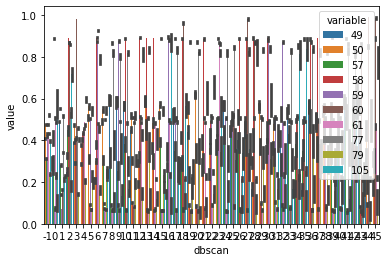

In [105]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['dbscan']
tidy = df_scaled[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)